<a href="https://colab.research.google.com/github/theDakshJaitly/TATASTEEL/blob/main/TATASTEEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('TATASTEEL.csv')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].apply(lambda date: date.toordinal())


In [ ]:
X = df[['Date']].values
y = df['Close'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_train_scaled)


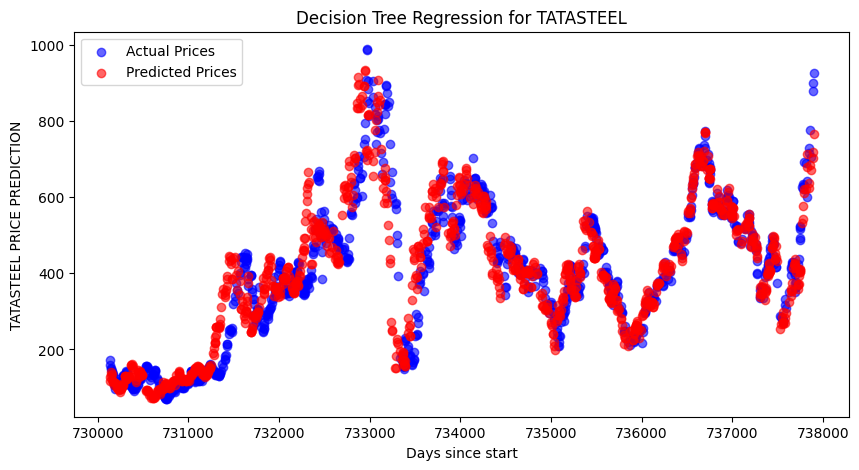

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
y_pred_tree_test = tree_model.predict(X_test_scaled)
plt.scatter(X_test, y_pred_tree_test, color='red', label='Predicted Prices', alpha=0.6)
plt.xlabel('Days since start')
plt.ylabel('TATASTEEL PRICE PREDICTION')
plt.title('Decision Tree Regression for TATASTEEL')
plt.legend()
plt.show()

In [ ]:
y_pred_tree_test = tree_model.predict(X_test_scaled)

# Now, use y_pred_tree_test to calculate the MSE:
mse_tree = mean_squared_error(y_test, y_pred_tree_test)
print(f'Mean Squared Error (Decision Tree): {mse_tree}')

Mean Squared Error (Decision Tree): 7321.956692561205


In [ ]:
y_pred_tree_test = tree_model.predict(X_test_scaled)

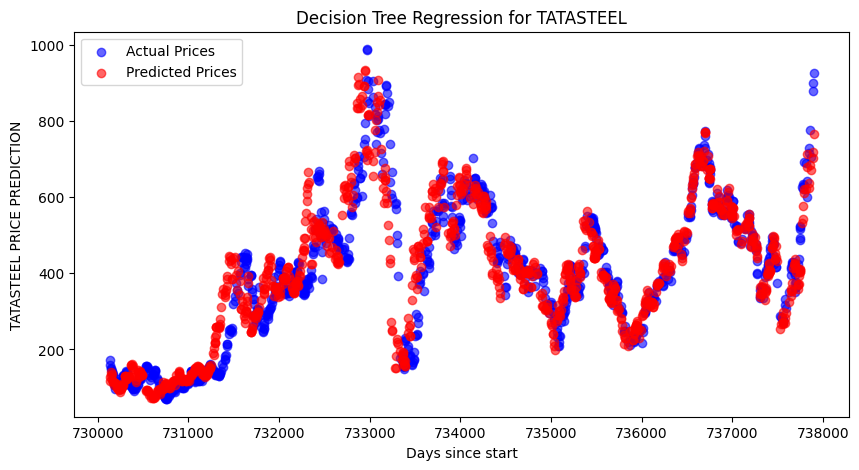

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)  # Actual values from the test set
plt.scatter(X_test, y_pred_tree_test, color='red', label='Predicted Prices', alpha=0.6)  # Predicted values from the test set
plt.xlabel('Days since start')
plt.ylabel('TATASTEEL PRICE PREDICTION')
plt.title('Decision Tree Regression for TATASTEEL')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_train_scaled)

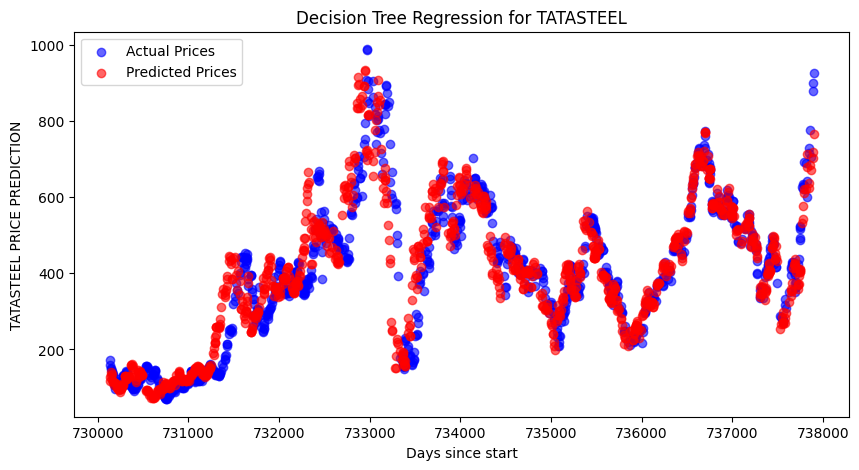

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)  # Actual values from the test set
y_pred_rf = tree_model.predict(X_test_scaled)
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted Prices', alpha=0.6)  # Predicted values from the test set
plt.xlabel('Days since start')
plt.ylabel('TATASTEEL PRICE PREDICTION')
plt.title('Decision Tree Regression for TATASTEEL')
plt.legend()
plt.show()

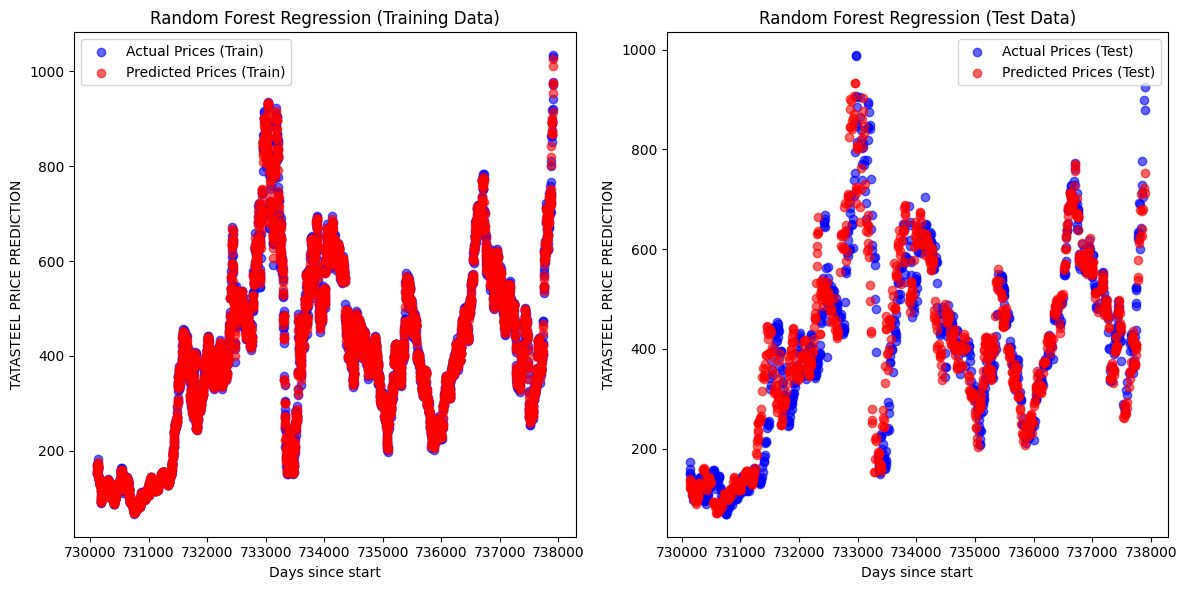

In [ ]:
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)


X_train_feature = X_train[:, 0]
X_test_feature = X_test[:, 0]

# Plotting Actual vs Predicted values for Training Data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_feature, y_train, color='blue', label='Actual Prices (Train)', alpha=0.6)
plt.scatter(X_train_feature, y_pred_rf_train, color='red', label='Predicted Prices (Train)', alpha=0.6)
plt.xlabel('Days since start')
plt.ylabel('TATASTEEL PRICE PREDICTION')
plt.title('Random Forest Regression (Training Data)')
plt.legend()

# Plotting Actual vs Predicted values for Test Data
plt.subplot(1, 2, 2)
plt.scatter(X_test_feature, y_test, color='blue', label='Actual Prices (Test)', alpha=0.6)
plt.scatter(X_test_feature, y_pred_rf_test, color='red', label='Predicted Prices (Test)', alpha=0.6)
plt.xlabel('Days since start')
plt.ylabel('TATASTEEL PRICE PREDICTION')
plt.title('Random Forest Regression (Test Data)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred_rf_test)
print(f'Mean Squared Error (Random Forest): {mse}')

Mean Squared Error (Random Forest): 7261.53619960287
